<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [5]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

In [6]:
# Showing dataframe dimensions
listings_df.shape

(43566, 75)

In [7]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [8]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
24464,50084513,https://www.airbnb.com/rooms/50084513,20230605012709,2023-06-05,city scrape,Home in Brooklyn · ★4.87 · 2 bedrooms · 2 beds...,"Wifi, 5-10 minutes walk to public transportati...",friendly neighborhood.,https://a0.muscache.com/pictures/miso/Hosting-...,306351832,https://www.airbnb.com/users/show/306351832,Samuel,2019-11-02,NaN,NaN,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/6888e...,https://a0.muscache.com/im/pictures/user/6888e...,Ocean Hill,1.0,3.0,"['email', 'phone']",t,t,"Brooklyn, New York, United States",Crown Heights,Brooklyn,40.67285,-73.91909,Entire home,Entire home/apt,2,NaN,1 bath,2.0,2.0,"[""Private patio or balcony"", ""Cleaning product...",$180.00,4,25,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,27,57,87,87,2023-06-05,15,7,1,2021-07-29,2023-05-21,4.87,5.00,4.93,4.87,4.93,4.80,4.87,NaN,f,1,1,0,0,0.66
17423,36180667,https://www.airbnb.com/rooms/36180667,20230605012709,2023-06-05,previous scrape,Condo in New York · 1 bedroom · 1 bed · 1.5 sh...,"Beautiful, sparkling clean condo in historic H...","Stiver's Row, Alexander Hamilton's house withi...",https://a0.muscache.com/pictures/8dcd9ed1-98e2...,33362434,https://www.airbnb.com/users/show/33362434,Melani,2015-05-14,"New York, NY",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/users/33362434/prof...,https://a0.muscache.com/im/users/33362434/prof...,Harlem,1.0,4.0,"['email', 'phone']",t,t,"New York, United States",Harlem,Manhattan,40.81758,-73.94293,Private room in condo,Private room,2,NaN,1.5 shared baths,NaN,1.0,"[""Breakfast"", ""Air conditioning"", ""Hangers"", ""...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,2023-06-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
14830,30059328,https://www.airbnb.com/rooms/30059328,20230605012709,2023-06-05,previous scrape,Rental unit in New York · ★4.80 · 1 bedroom · ...,It's 5 floor walk up but you are in the heart ...,NaN,https://a0.muscache.com/pictures/0f29b838-0f50...,41194120,https://www.airbnb.com/users/show/41194120,Melissa,2015-08-11,"New York, NY",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/41194120/prof...,https://a0.muscache.com/im/users/41194120/prof...,Greenwich Village,1.0,1.0,"['email', 'phone']",t,t,NaN,Greenwich Village,Manhattan,40.72969,-74.00107,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Kitchen"", ""Heating"", ""Pets allowed"", ""Essent...",$244.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,f,0,0,0,0,2023-06-05,6,0,0,2018-12-23,2019-12-30,4.80,4.80,4.40,4.80,5.00,5.00,4.80,NaN,f,1,1,0,0,0.11
22660,47138527,https://www.airbnb.com/rooms/47138527,20230605012709,2023-06-05,previous scrape,Townhouse in Brooklyn · ★4

## 2. Univariate analysis

# **Desarrollo de la estrategia**

Analysis univariate for price

In [9]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [10]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["price_float"].nunique()

1240

In [11]:
# find the maximun value
listings_df["price_float"].max()

90120.0

In [12]:
# find the minimun value different to 0
listings_df["price_float"].where(listings_df["price_float"] != 0).min()

10.0

In [13]:
# Calculating the relative frecuency of price
listings_df["price_float"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

150.0     0.026879
100.0     0.023642
200.0     0.021301
80.0      0.016458
50.0      0.016412
            ...   
1390.0    0.000023
927.0     0.000023
602.0     0.000023
1423.0    0.000023
997.0     0.000023
Name: price_float, Length: 1240, dtype: float64

In [14]:
# Provides important statistical values to keep in mind
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean       225.216109
std        818.738268
min          0.000000
5%          42.000000
25%         80.000000
50%        136.000000
75%        228.000000
95%        561.000000
max      90120.000000
Name: price_float, dtype: float64

In [15]:
mediana = listings_df["price_float"].median()
print(mediana)

136.0


In [16]:
from scipy import stats
moda = stats.mode(listings_df["price_float"], keepdims=True)
print(moda)

ModeResult(mode=array([150.]), count=array([1171]))


In [17]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

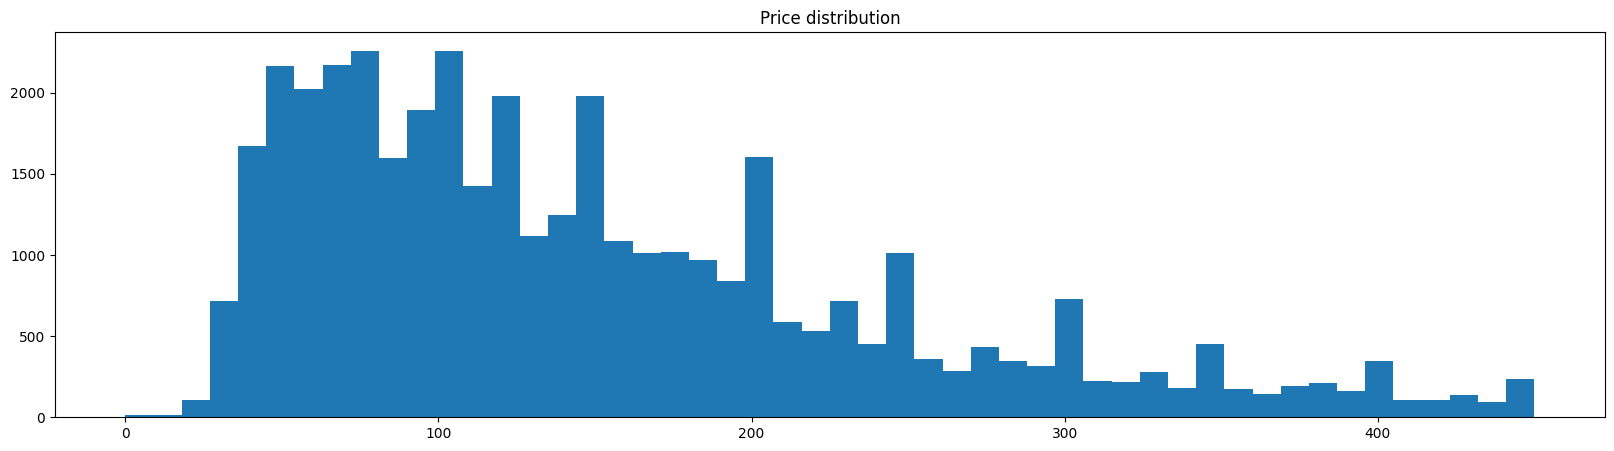

In [18]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

Analysis univariate for Minimum_nights

In [19]:
# Showing the number of unique values of listing Minimum_nights
# This can be helpful to diagnose duplicity
listings_df["minimum_nights"].nunique()

131

In [20]:
# Showing the number of unique values of listing minimum_nights
# This can be helpful to diagnose duplicity
listings_df["minimum_nights"].unique()

array([  30,    5,   21,    7,   31,    2,   90,    3,    1,  200,    4,
         60,   10,   28,   14,   15,    6,  120,   40,   48,   45,   29,
        180,  181,  365,   85,   18,  150,   12,    9,   20,    8,   89,
         50,  370,  100,   55,   27,   80,   58,   26,  265,  300,  185,
         56,  260,  240,   25,   19,  250,   42, 1124,  360,  270,   59,
        210,   70, 1250,   23,  198,  500,   13,  480,   22,   99,  186,
        119,   35,   68,  366,   32,   16,  183,   93,   69,  364,   91,
         75,   33,  299,  400,   24,   52,  108,   41,   98,  133,  222,
        130,  184,  153,  999,   62,   53,  160,  169,  114,  155,   43,
         96,  145,  182,   76, 1000,  304,   38,   17,  307,   36,  110,
        273,  238,  175,   11,   92,  259,   63,  140,   64,   94,   65,
        356,  310,   61,  301,   78,   49,   47,  367,   34,   95])

In [21]:
# find the maximun value
listings_df["minimum_nights"].max()

1250

In [22]:
# find the minimun value different to 0
listings_df["minimum_nights"].where(listings_df["minimum_nights"] != 0).min()

1

In [23]:
# Calculating the relative frecuency of room types
listings_df["minimum_nights"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

30     0.438346
1      0.183124
2      0.118074
3      0.085984
5      0.034775
         ...   
62     0.000023
53     0.000023
169    0.000023
114    0.000023
95     0.000023
Name: minimum_nights, Length: 131, dtype: float64

In [25]:
# Provides important statistical values to keep in mind
listings_df["minimum_nights"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean        18.700271
std         27.804388
min          1.000000
5%           1.000000
25%          2.000000
50%         15.000000
75%         30.000000
95%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [24]:
mediana = listings_df["minimum_nights"].median()
print(mediana)

15.0


In [26]:
# Find the mod
from scipy import stats
moda = stats.mode(listings_df["minimum_nights"], keepdims=True)
print(moda)

ModeResult(mode=array([30]), count=array([19097]))


In [27]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["minimum_nights"].quantile(0.25)
q3 = listings_df["minimum_nights"].quantile(0.75)
iqr = q3 - q1

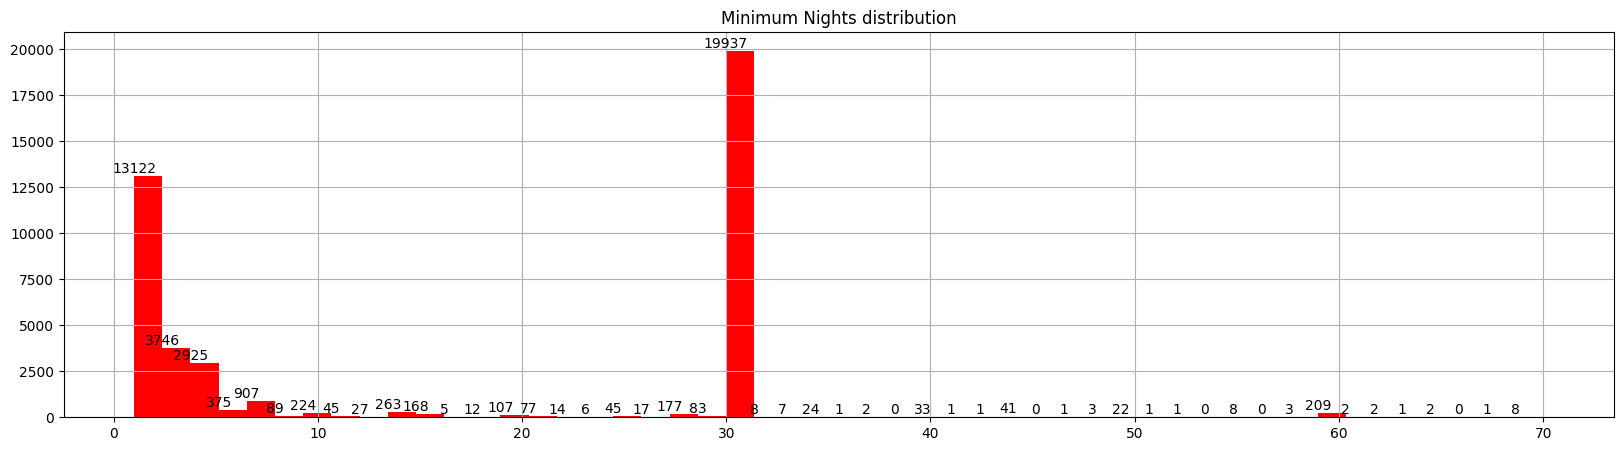

In [28]:
plt.figure(figsize=(20, 5))
hist_values, hist_edges, _ = plt.hist(listings_df.loc[listings_df["minimum_nights"] <= (q3 + 1.5 * iqr)]["minimum_nights"], bins=50, color='red')
plt.title("Minimum Nights distribution")
plt.grid(True)

# Add values to the bars
for i in range(len(hist_values)):
    plt.text(hist_edges[i], hist_values[i] + 5, str(int(hist_values[i])), ha='center', va='bottom', fontsize=10)

plt.show()

Analysis univariate for Neighbourhood

In [29]:
# Showing the number of unique values of listing Neighbourhood
# This can be helpful to diagnose duplicity
listings_df["neighbourhood_cleansed"].nunique()

223

In [30]:
# Showing the number of unique values of listing Neighbourhood
# This can be helpful to diagnose duplicity
listings_df["neighbourhood_cleansed"].unique()

array(['Midtown', 'Bedford-Stuyvesant', 'Lower East Side', 'Sunset Park',
       'Chinatown', 'Tribeca', 'East Village', 'Williamsburg',
       'Upper West Side', 'Greenwich Village', 'Chelsea', 'East Harlem',
       'South Slope', 'Clinton Hill', 'Harlem', 'Greenpoint',
       'Fort Greene', 'Clason Point', 'Washington Heights', 'Eastchester',
       "Hell's Kitchen", 'Upper East Side', 'Flatbush', 'Kips Bay',
       'Long Island City', 'Crown Heights', 'Carroll Gardens', 'Nolita',
       'West Village', 'Park Slope', 'Gowanus', 'Forest Hills',
       'Murray Hill', 'Astoria', 'Boerum Hill', 'East Flatbush',
       'Kingsbridge', 'Prospect Heights', 'Sunnyside', 'St. George',
       'Bushwick', 'Windsor Terrace', 'Ridgewood', 'Mott Haven',
       'University Heights', 'Morningside Heights', 'Ditmars Steinway',
       'Middle Village', 'Rockaway Beach', 'Allerton', 'Jamaica',
       'East New York', 'Brooklyn Heights', 'Emerson Hill',
       'Flatiron District', 'Fort Hamilton', 'Benso

In [31]:
# Calculating the relative frecuency of room types
listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Bedford-Stuyvesant        0.072878
Williamsburg              0.059427
Harlem                    0.047996
Midtown                   0.047721
Bushwick                  0.041959
                            ...   
Chelsea, Staten Island    0.000023
Neponsit                  0.000023
New Dorp                  0.000023
Lighthouse Hill           0.000023
Fort Wadsworth            0.000023
Name: neighbourhood_cleansed, Length: 223, dtype: float64

In [32]:
# Provides important statistical values to keep in mind
listings_df["neighbourhood_cleansed"].describe()

count                  43566
unique                   223
top       Bedford-Stuyvesant
freq                    3175
Name: neighbourhood_cleansed, dtype: object

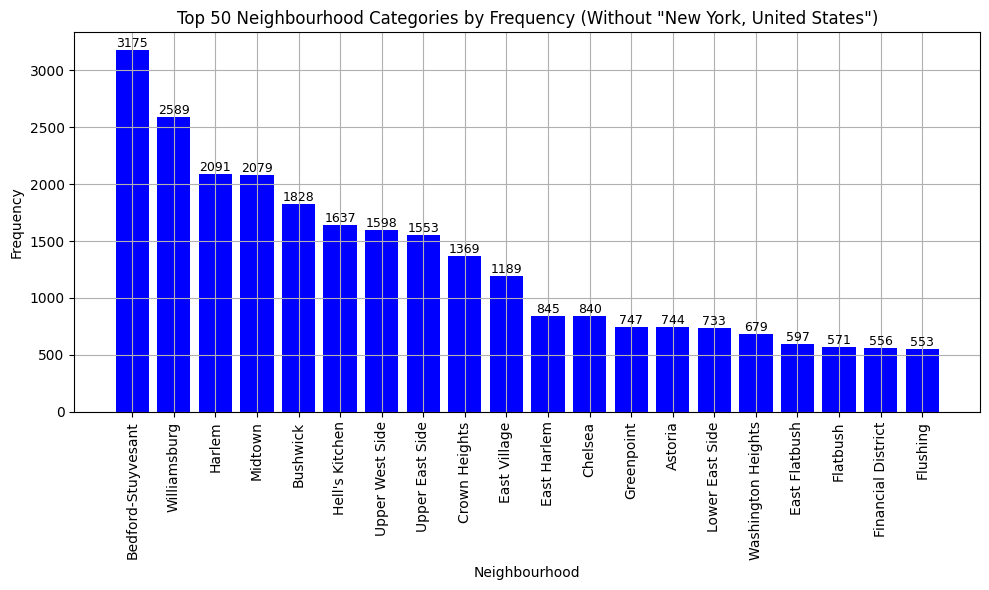

In [33]:
# Reemplazar "New York, United States" con una cadena vacía en la columna "neighbourhood"
listings_df["neighbourhood_cleansed"] = listings_df["neighbourhood_cleansed"].str.replace("New York, United States", "").str.strip()

# Calcular la frecuencia de las categorías modificadas
neighbourhood_frequencies = listings_df["neighbourhood_cleansed"].value_counts()

# Tomar los primeros 50 valores de frecuencia
neighbourhood_top50 = neighbourhood_frequencies.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(neighbourhood_top50.index, neighbourhood_top50.values, color='blue')
plt.bar(neighbourhood_top50.index, neighbourhood_top50.values, color='blue')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Top 50 Neighbourhood Categories by Frequency (Without "New York, United States")')
plt.xticks(rotation=90)
plt.grid(True)

# Agregar los valores a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)


plt.tight_layout()
plt.show()

Analysis univariate for Amenities

In [34]:
# Showing the number of unique values of listing room_type
# This can be helpful to diagnose duplicity
listings_df["room_type"].nunique()

4

In [35]:
# Showing the number of unique values of listing room_type
# This can be helpful to diagnose duplicity
listings_df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [36]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Entire home/apt    0.565785
Private room       0.417436
Shared room        0.013313
Hotel room         0.003466
Name: room_type, dtype: float64

In [37]:
# Provides important statistical values to keep in mind
listings_df["room_type"].describe()

count               43566
unique                  4
top       Entire home/apt
freq                24649
Name: room_type, dtype: object

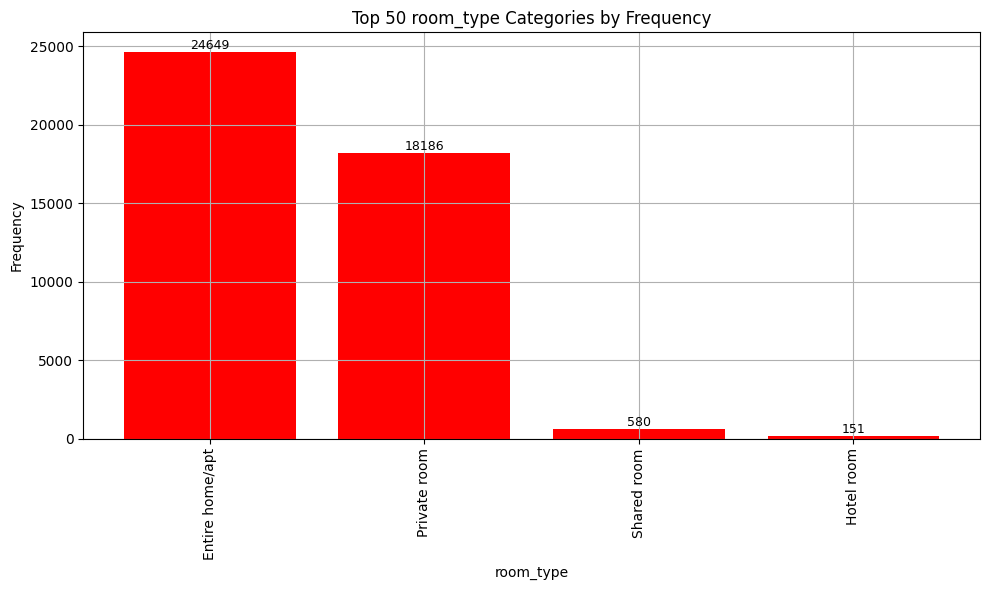

In [38]:
# Calcular la frecuencia de las categorías modificadas
room_type_frequencies = listings_df["room_type"].value_counts()

# Tomar los primeros 50 valores de frecuencia
room_type_top50 = room_type_frequencies.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(room_type_top50.index, room_type_top50.values, color='red')
plt.bar(room_type_top50.index, room_type_top50.values, color='red')
plt.xlabel('room_type')
plt.ylabel('Frequency')
plt.title('Top 50 room_type Categories by Frequency')
plt.xticks(rotation=90)
plt.grid(True)

# Agregar los valores a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)


plt.tight_layout()
plt.show()

Analysis univariate for number_of_reviews

In [39]:
# Showing the number of unique values of listing number_of_reviews
# This can be helpful to diagnose duplicity
listings_df["number_of_reviews"].nunique()

490

In [40]:
# Showing the number of unique values of listing number_of_reviews
# This can be helpful to diagnose duplicity
listings_df["number_of_reviews"].unique()

array([  49,   50,   22,    3,   35,   69,  110,   38,  589,   53,  118,
         10,    5,  194,  233,   32,  189,    1,  268,  502,  165,    4,
         92,  245,  179,   13,  231,  281,  164,  334,  178,    0,   67,
         56,   58,   98,   82,  148,  240,   14,  299,   17,  368,  308,
         46,   61,  168,  253,   76,   36,  191,  269,  306,   16,   60,
         59,   90,  166,   93,   20,   68,   57,   29,  160,  479,  212,
        252,  326,   25,  225,   47,   21,   27,   75,   71,  126,  365,
         84,    7,  119,   63,  180,   70,  263,   41,   30,   15,  539,
         18,  292,  105,   37,   40,    9,   19,   52,   83,  261,  144,
        124,   43,   85,  393,   51,  254,  229,   44,   11,   31,  337,
         73,    2,  208,   62,  280,  184,   77,  255,   26,  232,  128,
        447,  193,   81,  156,  388,    6,  145,   48,  137,  239,  159,
         33,   12,  262,  282,  154,  461,  131,  122,  340,  338,  177,
        274,   34,  285,  100,  175,  260,  296,  2

In [41]:
# find the maximun value
listings_df["number_of_reviews"].max()

2024

In [ ]:
# find the minimun value different to 0
listings_df["number_of_reviews"].min()

In [43]:
# Calculating the relative frecuency of number of reviews
listings_df["number_of_reviews"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

0      0.240922
1      0.097255
2      0.062457
3      0.046734
4      0.036772
         ...   
635    0.000023
503    0.000023
428    0.000023
485    0.000023
631    0.000023
Name: number_of_reviews, Length: 490, dtype: float64

In [44]:
# Provides important statistical values to keep in mind
listings_df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean        26.368544
std         57.740520
min          0.000000
5%           0.000000
25%          1.000000
50%          5.000000
75%         24.000000
95%        131.000000
max       2024.000000
Name: number_of_reviews, dtype: float64

In [45]:
# Provides the median value
mediana = listings_df["number_of_reviews"].median()
print(mediana)


5.0


In [46]:
# Provides the mod value
from scipy import stats
moda = stats.mode(listings_df["number_of_reviews"], keepdims=True)
print(moda)


ModeResult(mode=array([0]), count=array([10496]))


In [47]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["number_of_reviews"].quantile(0.25)
q3 = listings_df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1

[]

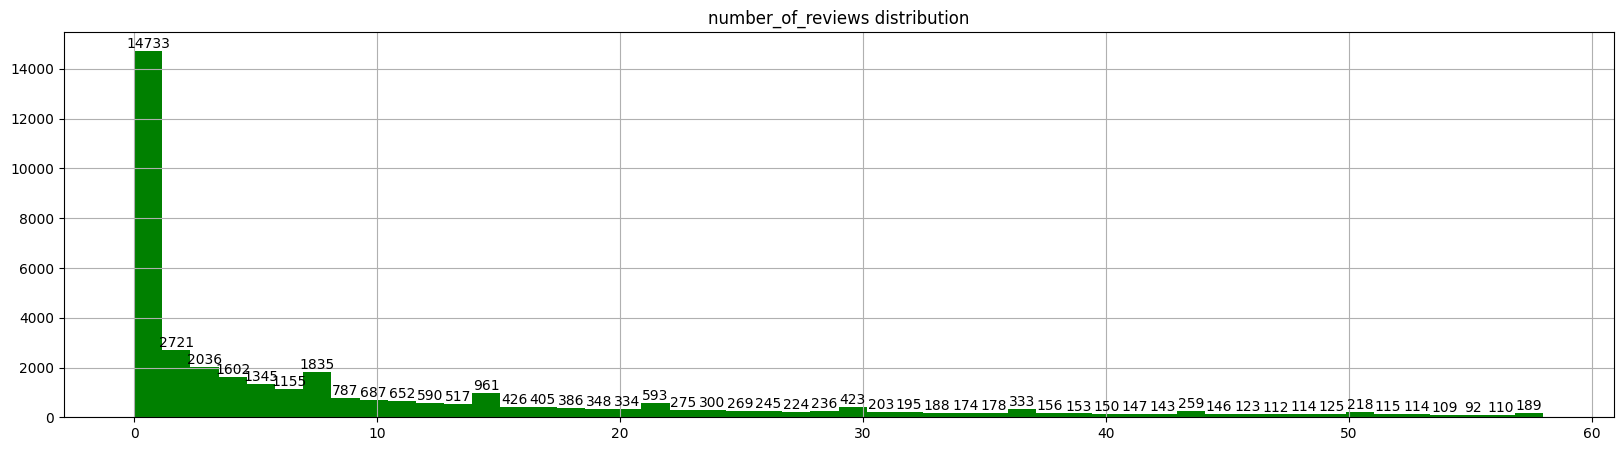

In [48]:
plt.figure(figsize=(20, 5))
n, bins, patches = plt.hist(listings_df.loc[listings_df["number_of_reviews"] <= (q3 + 1.5 * iqr)]["number_of_reviews"], bins=50, color="green")
plt.title("number_of_reviews distribution")
plt.grid(True)

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), f"{int(n[i])}", ha="center", va="bottom")


plt.plot()

## 2. Bivariate analysis

In [51]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [52]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Midtown',
 'Bushwick',
 "Hell's Kitchen",
 'Upper West Side',
 'Upper East Side',
 'Crown Heights',
 'East Village',
 'East Harlem',
 'Chelsea',
 'Greenpoint',
 'Astoria',
 'Lower East Side',
 'Washington Heights',
 'East Flatbush',
 'Flatbush',
 'Financial District',
 'Flushing',
 'Long Island City',
 'West Village',
 'Murray Hill',
 'Prospect-Lefferts Gardens',
 'Kips Bay',
 'Jamaica',
 'Clinton Hill',
 'Theater District',
 'Ridgewood',
 'Woodside',
 'Fort Greene',
 'East New York',
 'Park Slope',
 'Elmhurst',
 'SoHo',
 'Sunset Park',
 'Sunnyside',
 'East Elmhurst',
 'Chinatown',
 'Canarsie',
 'Ditmars Steinway',
 'Jackson Heights',
 'Gramercy',
 'Prospect Heights']

<ipython-input-53-d9ea79b6250e>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


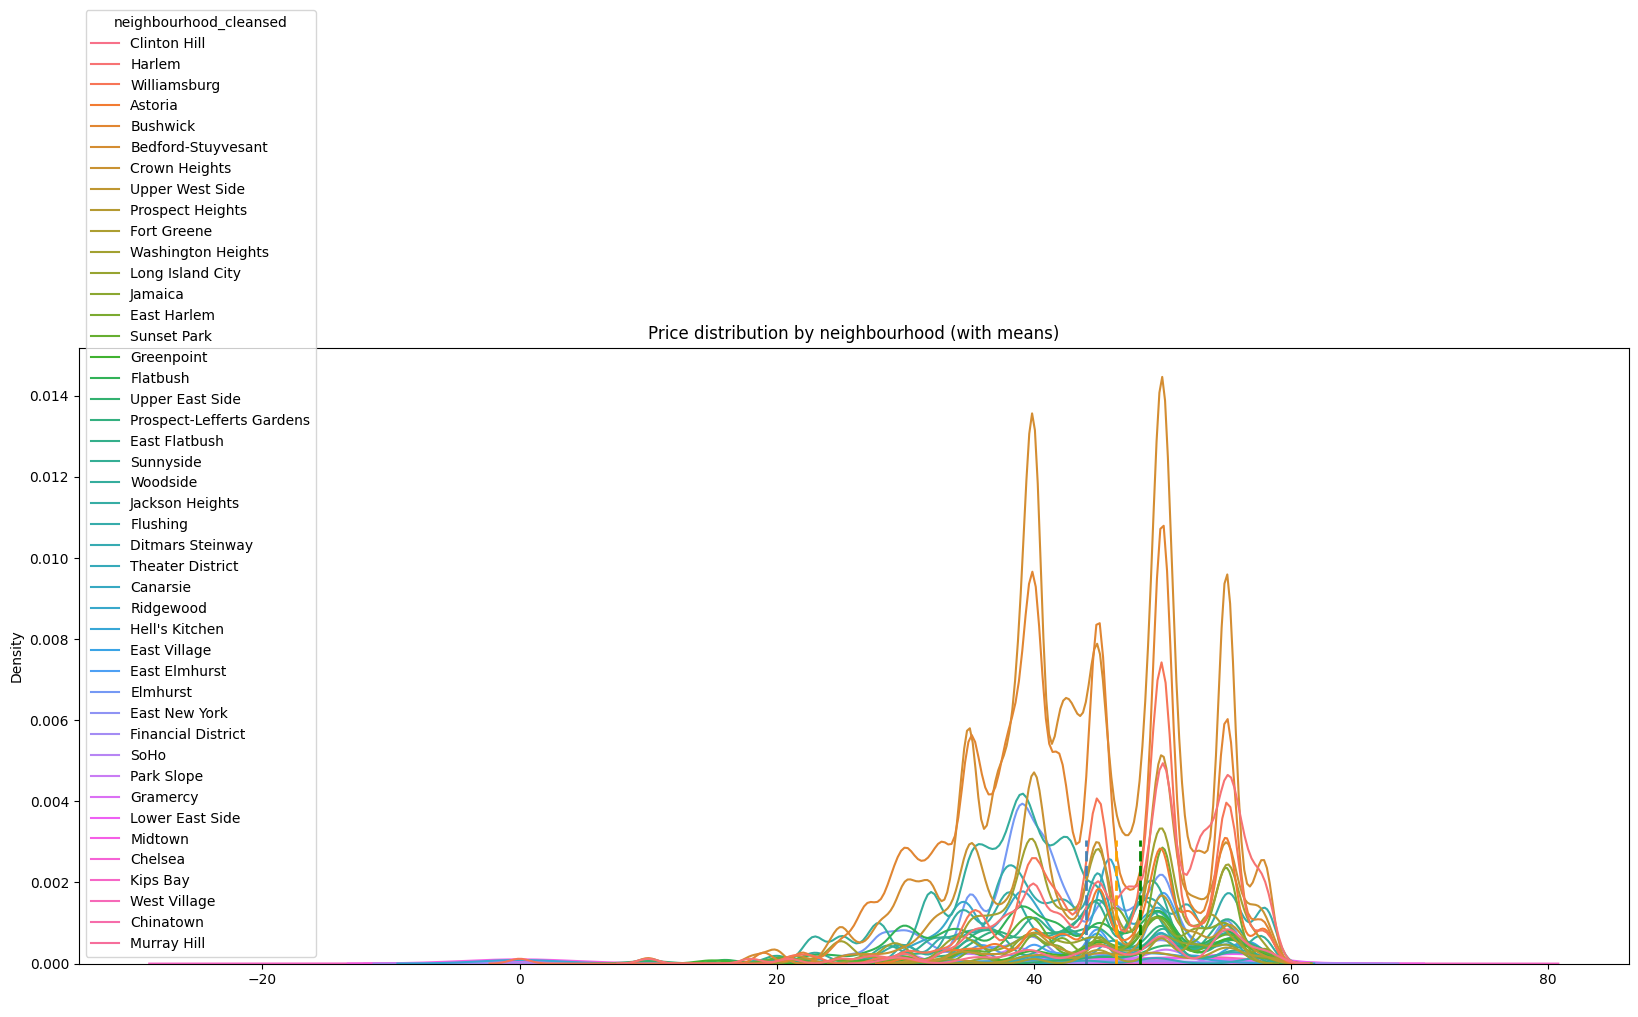

In [53]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

<ipython-input-54-242dade997c4>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


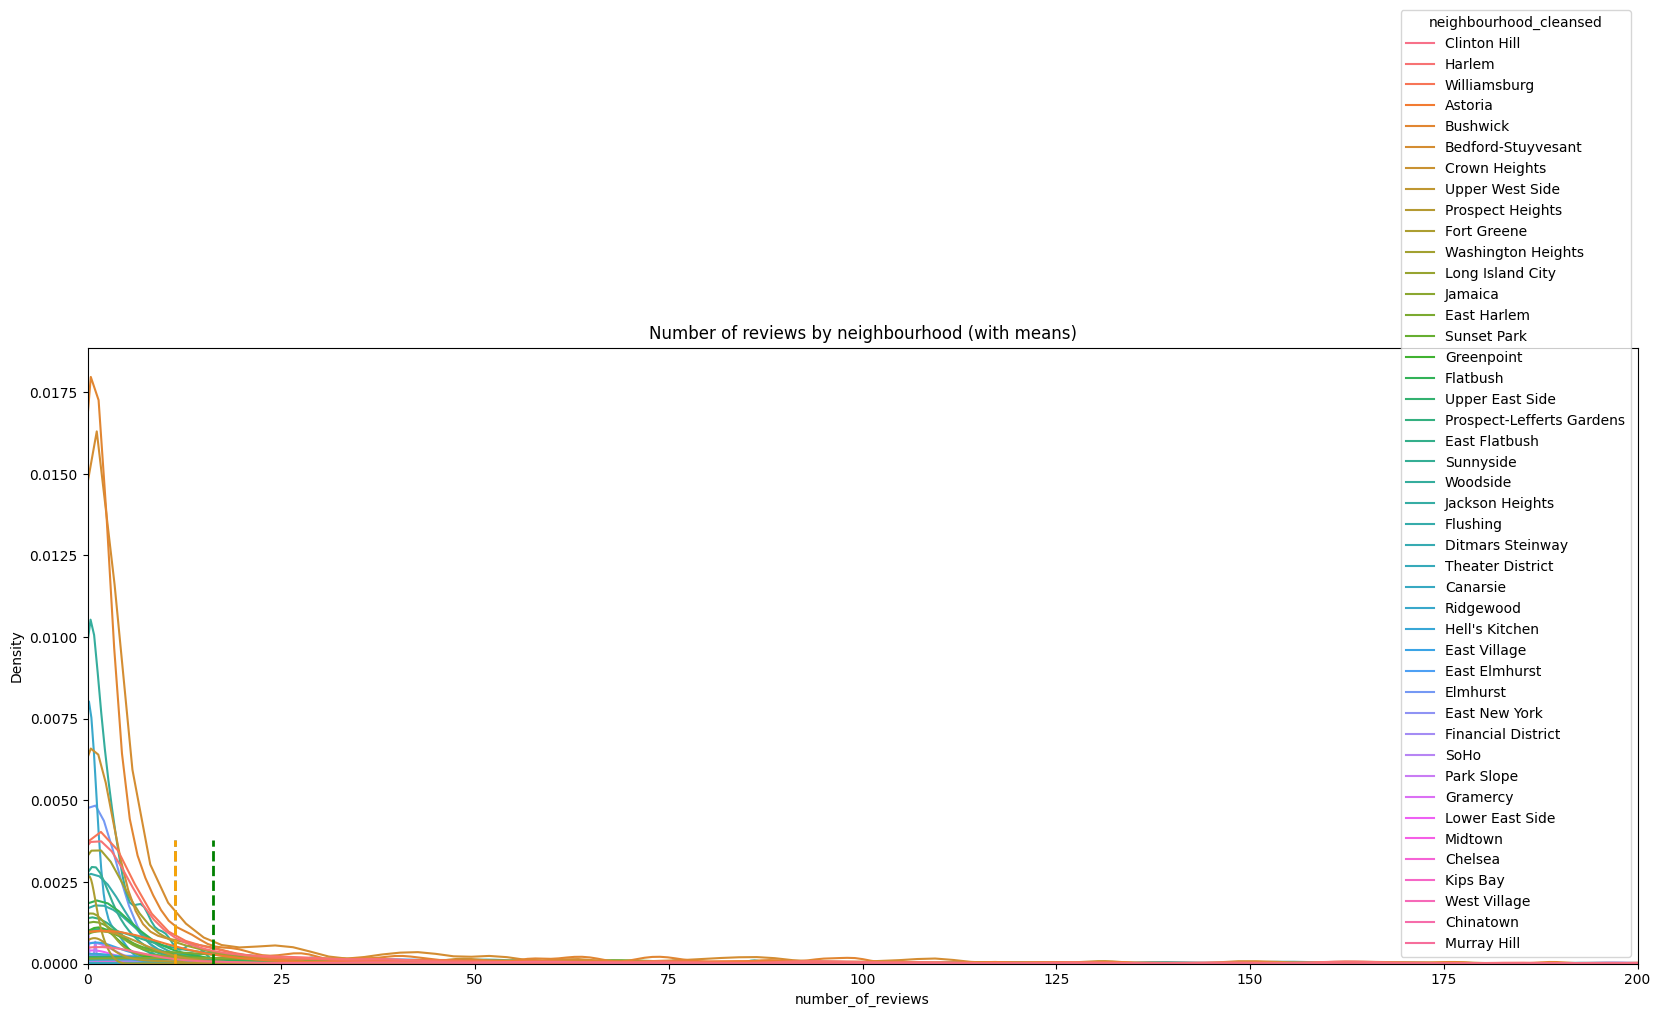

In [54]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Number of reviews by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()

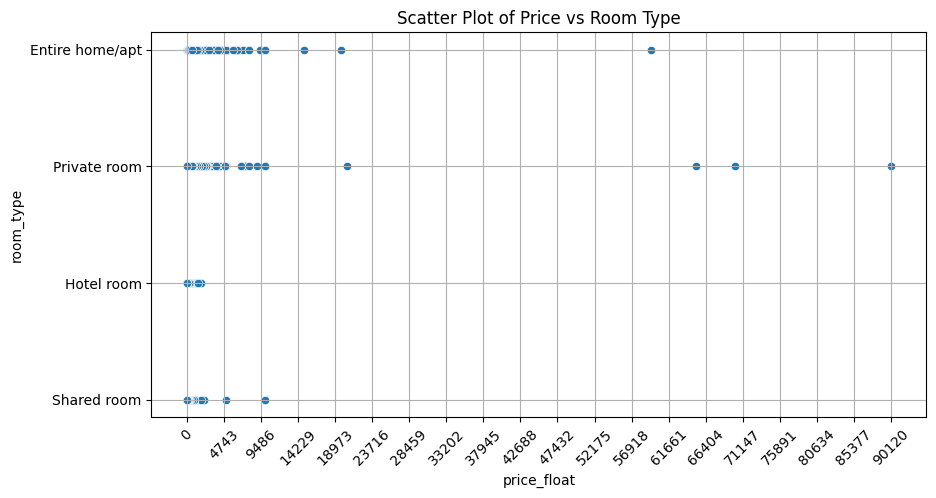

In [55]:
import numpy as np
# Crear el scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=listings_df, x="price_float", y="room_type")
plt.title("Scatter Plot of Price vs Room Type")
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el eje x
x_ticks = list(np.linspace(listings_df["price_float"].min(), listings_df["price_float"].max(), num=20))
plt.xticks(x_ticks, rotation=45)
plt.grid(True)

plt.show()

In [56]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(562, 76)

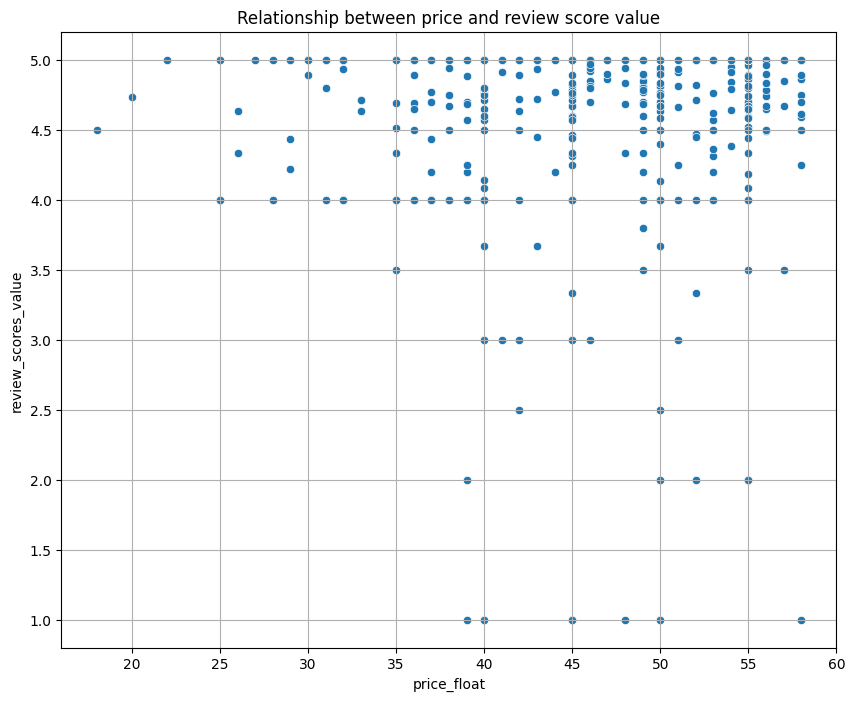

In [57]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

<ipython-input-58-2a1b59ad69d6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listings_df[["has_availability", "availability_30", "availability_60", "availability_90", "availability_365"]].corr(),


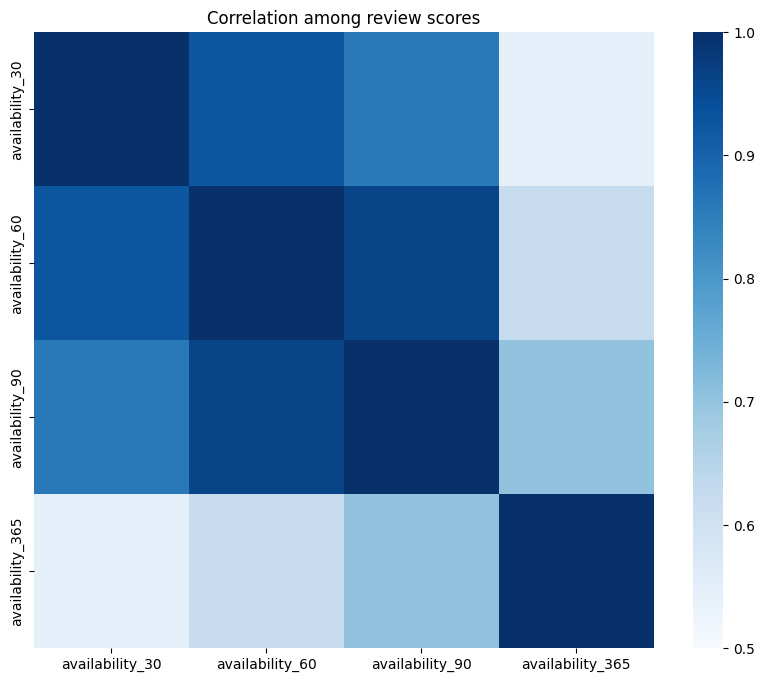

In [58]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["has_availability", "availability_30", "availability_60", "availability_90", "availability_365"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [59]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

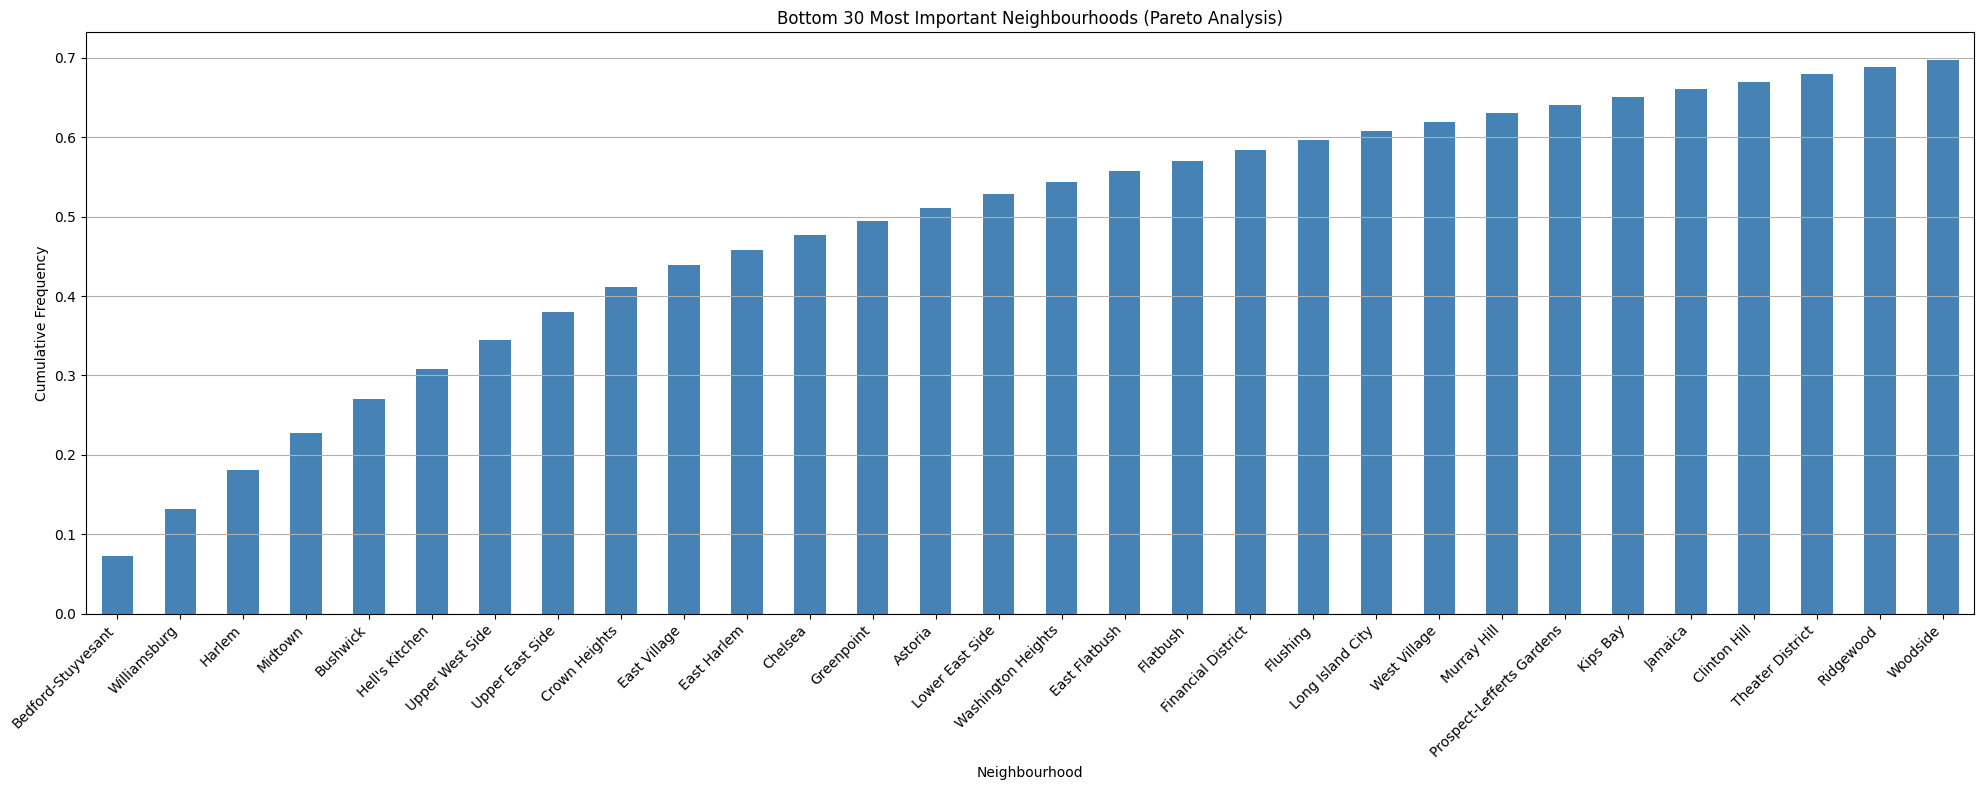

In [60]:
# Asegúrate de que tus datos estén ordenados en orden descendente
neighbourhood_frec_cumsum_sorted = neighbourhood_frec_cumsum.sort_values(ascending=True)

# Selecciona los primeros 30 vecindarios menos importantes
bottom_30_neighbourhoods = neighbourhood_frec_cumsum_sorted.head(30)

# Crear el gráfico
plt.figure(figsize=(20, 8))
bottom_30_neighbourhoods.plot(kind="bar", color="steelblue")
plt.title("Bottom 30 Most Important Neighbourhoods (Pareto Analysis)")
plt.ylabel("Cumulative Frequency")
plt.xlabel("Neighbourhood")
plt.grid(axis="y")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


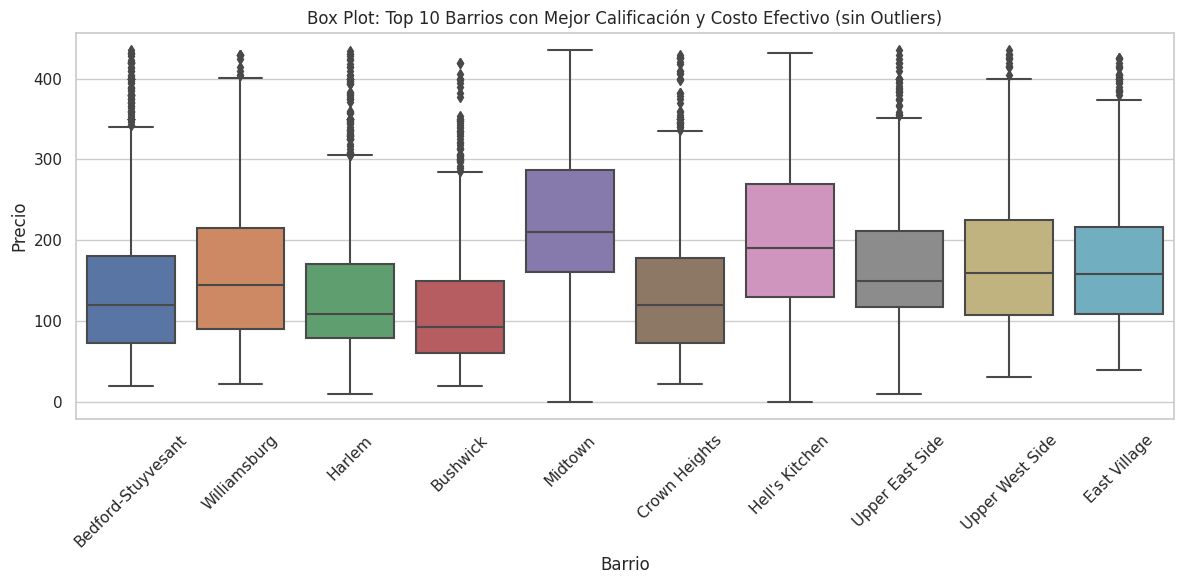

In [61]:
# Filtrar el DataFrame para incluir barrios con calificación mayor o igual a 4
filtered_df = listings_df[(listings_df["review_scores_value"] >= 4) & (listings_df["price_float"] <= 90000)]

# Identificar los 10 barrios con mejor calificación y costo efectivos
top_neighborhoods = filtered_df["neighbourhood_cleansed"].value_counts().head(10).index

# Filtrar nuevamente para incluir solo los barrios seleccionados
filtered_df = filtered_df[filtered_df["neighbourhood_cleansed"].isin(top_neighborhoods)]

# Definir función para eliminar outliers
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Aplicar función para eliminar outliers en "price_float"
filtered_df = remove_outliers(filtered_df, "price_float")

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el box plot con los 10 barrios seleccionados sin outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x="neighbourhood_cleansed", y="price_float", data=filtered_df, order=top_neighborhoods)
plt.xticks(rotation=45)
plt.title("Box Plot: Top 10 Barrios con Mejor Calificación y Costo Efectivo (sin Outliers)")
plt.xlabel("Barrio")
plt.ylabel("Precio")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

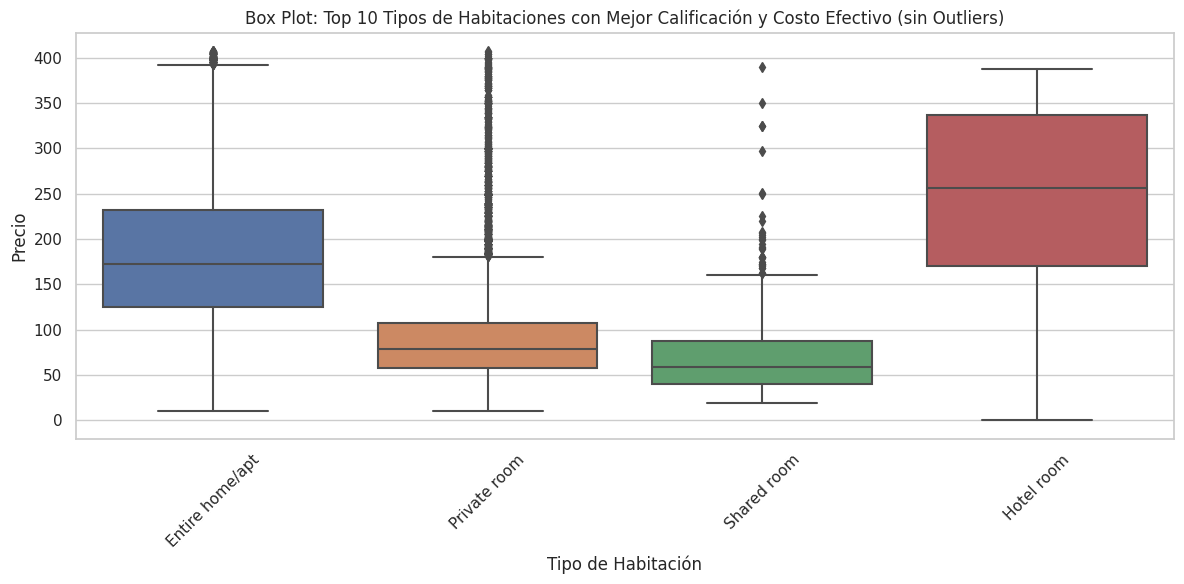

In [62]:
# Filtrar el DataFrame para incluir propiedades con calificación mayor o igual a 4
filtered_df = listings_df[(listings_df["review_scores_value"] >= 4) & (listings_df["price_float"] <= 90000)]

# Identificar los 10 tipos de habitaciones más comunes con mejor calificación y costo efectivos
top_room_types = filtered_df["room_type"].value_counts().head(10).index

# Filtrar nuevamente para incluir solo los tipos de habitaciones seleccionados
filtered_df = filtered_df[filtered_df["room_type"].isin(top_room_types)]

# Definir función para eliminar outliers
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Aplicar función para eliminar outliers en "price_float"
filtered_df = remove_outliers(filtered_df, "price_float")

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el box plot con los 10 tipos de habitaciones seleccionados sin outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x="room_type", y="price_float", data=filtered_df, order=top_room_types)
plt.xticks(rotation=45)
plt.title("Box Plot: Top 10 Tipos de Habitaciones con Mejor Calificación y Costo Efectivo (sin Outliers)")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Precio")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<Figure size 1200x600 with 0 Axes>

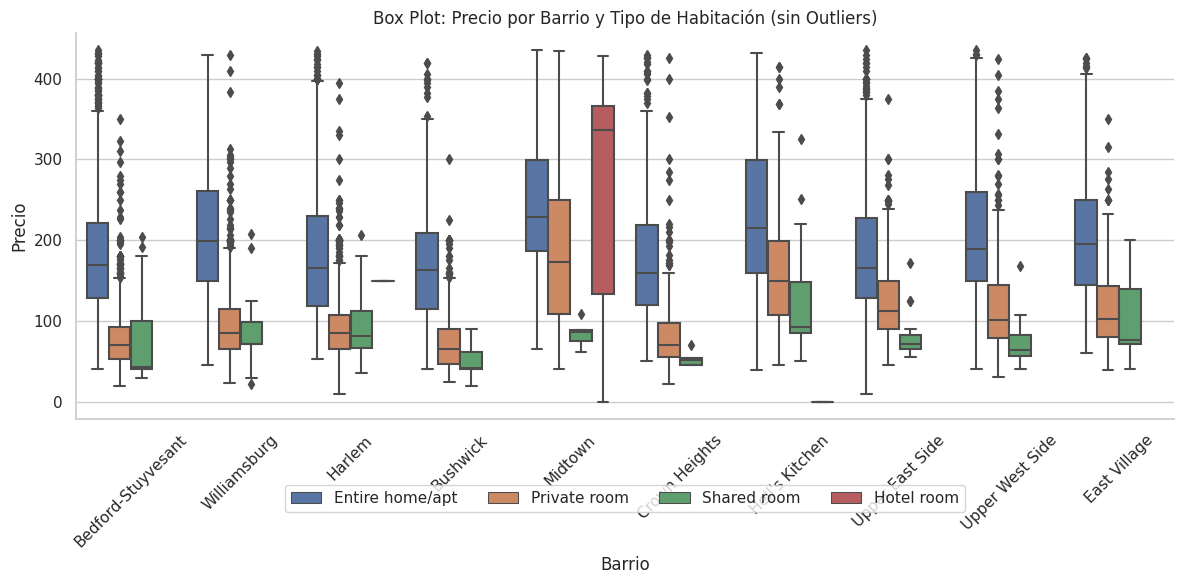

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir propiedades con calificación mayor o igual a 4
filtered_df = listings_df[(listings_df["review_scores_value"] >= 4) & (listings_df["price_float"] <= 90000)]

# Identificar los 10 barrios con mejor calificación y costo efectivos
top_neighborhoods = filtered_df["neighbourhood_cleansed"].value_counts().head(10).index

# Filtrar nuevamente para incluir solo los barrios seleccionados
filtered_df = filtered_df[filtered_df["neighbourhood_cleansed"].isin(top_neighborhoods)]

# Identificar los 10 tipos de habitaciones más comunes con mejor calificación y costo efectivos
top_room_types = filtered_df["room_type"].value_counts().head(10).index

# Filtrar nuevamente para incluir solo los tipos de habitaciones seleccionados
filtered_df = filtered_df[filtered_df["room_type"].isin(top_room_types)]

# Definir función para eliminar outliers
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Aplicar función para eliminar outliers en "price_float"
filtered_df = remove_outliers(filtered_df, "price_float")

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de caja con dos variables categóricas
plt.figure(figsize=(12, 6))
g = sns.catplot(
    x="neighbourhood_cleansed", y="price_float", hue="room_type",
    data=filtered_df, kind="box", height=6, aspect=2, order=top_neighborhoods,
    legend=True, legend_out=False  # Mostrar la leyenda y ajustar su posición
)
plt.xticks(rotation=45)
plt.title("Box Plot: Precio por Barrio y Tipo de Habitación (sin Outliers)")
plt.xlabel("Barrio")
plt.ylabel("Precio")
plt.tight_layout()

# Ajustar la posición de la leyenda debajo del eje x
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Mostrar el gráfico
plt.show()




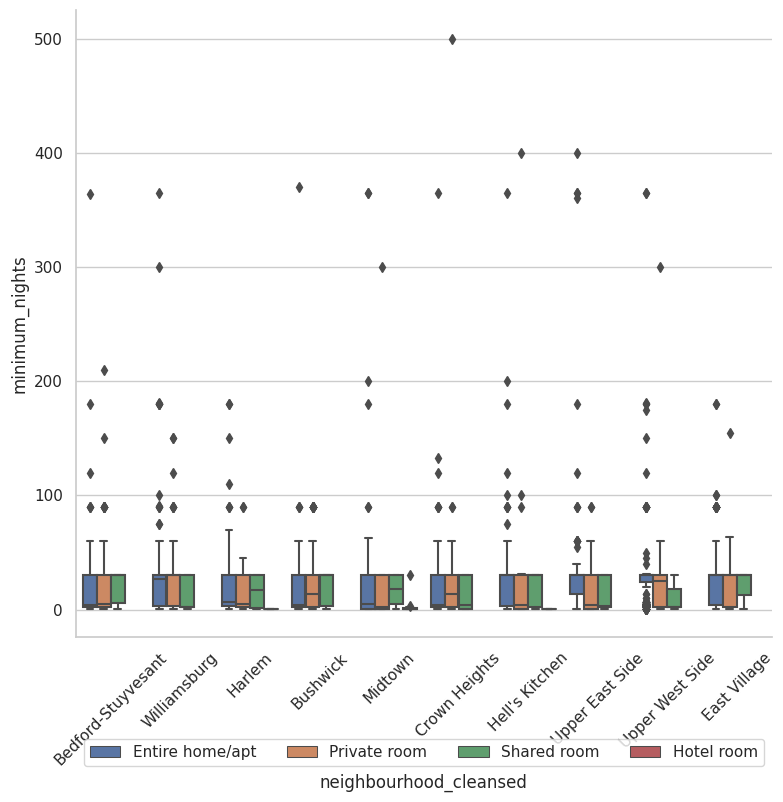

In [71]:
# Crear otro subplot para minimum_nights
g2 = sns.catplot(
    x="neighbourhood_cleansed", y="minimum_nights", hue="room_type",
    data=filtered_df, kind="box", height=4, aspect=2, order=top_neighborhoods,
    legend=False  # No mostrar la leyenda aquí
)
g2.set_xticklabels(rotation=45)

# Ajustar la posición de la leyenda debajo del eje x en ambos subplots
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
g2.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
plt.subplots_adjust(top=2)  # Espacio para el título principal

# Mostrar los gráficos
plt.show()